In [1]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=3efda0c87fe6b26ee54f91facc27e5c22f7d8474439d5252d821280b495534e7
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [2]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/trump.jpg
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/biden.jpg
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/biden2.jpg

--2023-03-09 13:51:25--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/trump.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/trump.jpg [following]
--2023-03-09 13:51:25--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/trump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13791 (13K) [image/jpeg]
Saving to: ‘trump.jpg’

trump.jpg           100%[===================>]  13.47K  --.-KB/s    in 0s      

2023-03-09 13:51:25 (78.5 MB/s) - ‘trump.jpg’ saved [13791/13791]

--2023-03-09 13:51:26--  https://git

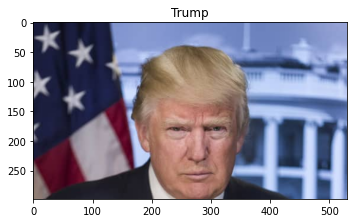

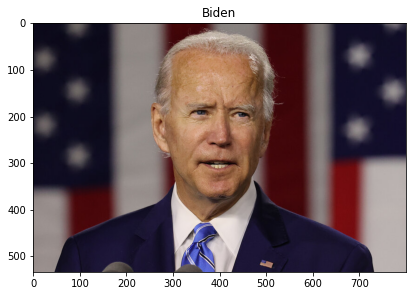

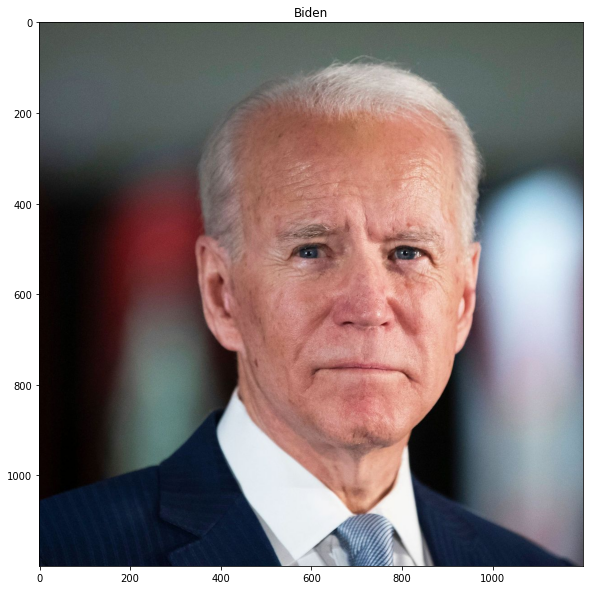

In [5]:
import cv2
from matplotlib import pyplot as plt

biden = cv2.imread('biden.jpg')
biden2 = cv2.imread('biden2.jpg')
trump = cv2.imread('trump.jpg')

imshow('Trump', trump)
imshow('Biden', biden)
imshow('Biden', biden2)

In [6]:
import face_recognition

known_image = face_recognition.load_image_file("biden.jpg")
unknown_image = face_recognition.load_image_file("trump.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

Face Match is False


In [7]:
import face_recognition

known_image = face_recognition.load_image_file("biden.jpg")
unknown_image = face_recognition.load_image_file("biden2.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

Face Match is True


###Recognize faces in an image

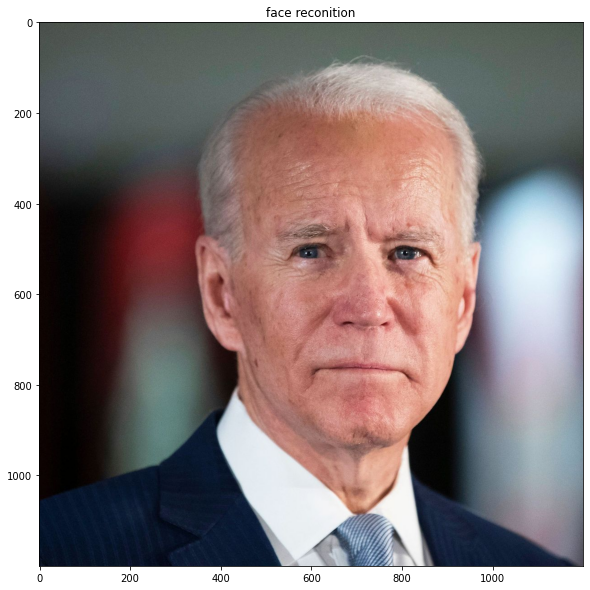

In [23]:
from face_recognition.api import face_locations
import face_recognition 
import cv2
import numpy as np
from matplotlib import pyplot as plt

#load a sample picture and learn how to recognize it.
trump_image = face_recognition.load_image_file("trump.jpg")
trump_face_encoding = face_recognition.face_encodings(trump_image)[0]

#load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

#create arrays of known face encodings and their names
known_face_encodings = [
    trump_face_encoding,
    biden_face_encoding
]
known_face_names =[
    "donald trump",
    "joe biden"
]

#initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

# grab a single frame of video
frame = cv2.imread('biden2.jpg')

#resize frame of video to 1/4 size for faster face recognition processing
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

#convert the image from BGR color (which openCV uses) to RGB color (which face_recongtion uses)
rgb_small_frame = small_frame[:, :, ::-1]

# only process every other frame  of video to save time
if process_this_frame:
  # find all the faces and face encodings in the current frame of video
  face_locations = face_recognition.face_locations(rgb_small_frame)
  face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

  face_names = []
  for face_encoding in face_encodings:
    # see if the face is a match for the face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    ## if a match wad found in known_face_encodings, just use the first one.
    # if True in matchs:
    #   first_match_index = matches.index(True)
    #   name = known_face_names[first_match_index]

    # or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]

    face_names.append(name)

#display the results
for (top,right,bottom,left), name in zip(face_locations, face_names):
  # scale back up face locations since the frame we detected in was scaled to 1/4 size
  top *= 4
  right *= 4
  bottom *= 4
  left *= 4

  #draw a box around the face
  cv2.rectangle(frame, (left, top) , (right, bottom), (0,0,255), 2)

  #draw a label with a name below the face
  cv2.rectangle(frame, (left,bottom - 35), (right, bottom), (0,0,255), cv2.FILLED)
  font = cv2.FONT_HERSHEY_DUPLEX
  cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0,(255, 255, 255), 1)

#display the resulting image
imshow('face reconition', frame)